# Cell 1 — Title & Description (Markdown)

# Anomaly Detection using PyOD (on synthetic data)

This notebook demonstrates how to use the PyOD library to detect outliers (anomalies) in a multivariate dataset.  
We will:

- Generate a synthetic 2-dimensional dataset with normal data + explicit outliers  
- Use a PyOD detector (e.g. Isolation Forest or KNN-based) to detect anomalies  
- Plot the data, highlight anomalies, and inspect scores  
- Show that PyOD works even without labels (unsupervised anomaly detection)  


# Cell 2 — Install & Imports (code)

In [1]:
!pip install -q pyod matplotlib numpy pandas scikit-learn --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.utils.data import generate_data


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 kB 4.5 MB/s eta 0:00:00


# Cell 3 — Generate Synthetic Data (normal + outliers)

Data shape: (300, 2)  — with fraction of outliers: 0.1


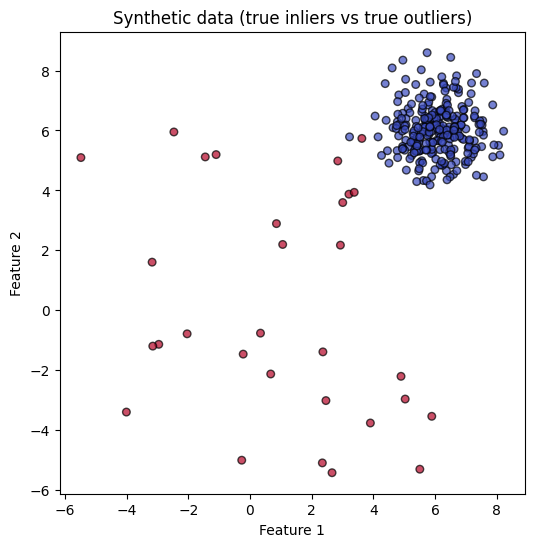

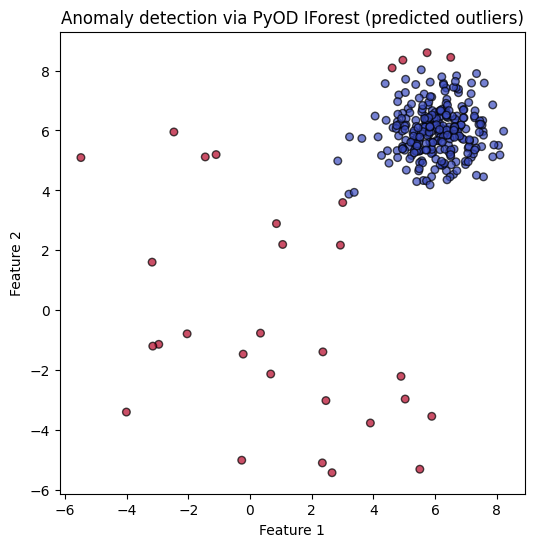

Number of points flagged as outlier: 30 / 300


In [3]:
# Option A: use PyOD helper to generate simple data (low-dimensional)
X_train, X_test, y_train, y_test = generate_data(
    n_train=200, n_test=100, n_features=2, contamination=0.1, random_state=42
)
X = np.vstack([X_train, X_test])
y_true = np.hstack([y_train, y_test])  # 0 = inlier, 1 = outlier (only for evaluation / demo)

print("Data shape:", X.shape, " — with fraction of outliers:", y_true.mean())

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y_true, cmap="coolwarm", s=30, edgecolor="k", alpha=0.7)
plt.title("Synthetic data (true inliers vs true outliers)")
plt.xlabel("Feature 1"); plt.ylabel("Feature 2")
plt.show()
clf = IForest(contamination=0.1, random_state=42)
clf.fit(X)

# Get raw “outlier scores” (higher = more anomalous)
scores = clf.decision_scores_

# Get binary predictions: 0 = inlier, 1 = outlier
y_pred = clf.predict(X)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap="coolwarm", s=30, edgecolor="k", alpha=0.7)
plt.title("Anomaly detection via PyOD IForest (predicted outliers)")
plt.xlabel("Feature 1"); plt.ylabel("Feature 2")
plt.show()

print("Number of points flagged as outlier:", sum(y_pred == 1), "/", len(y_pred))



# Cell 5 — (Optional) Try Another Detector — KNN

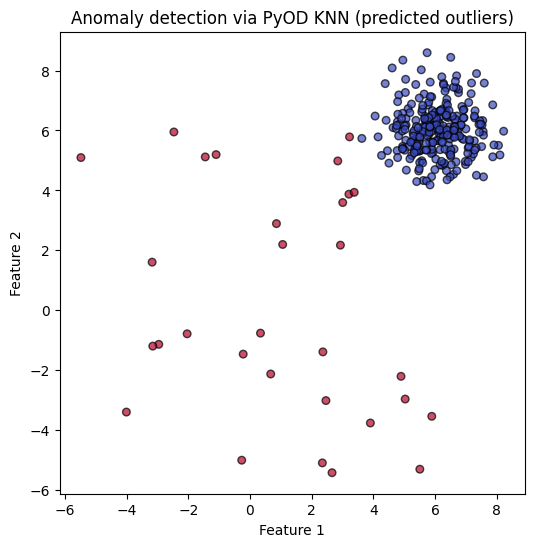

Outliers by KNN: 30 / 300


In [4]:
clf2 = KNN(contamination=0.1)
clf2.fit(X)
y_pred2 = clf2.predict(X)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y_pred2, cmap="coolwarm", s=30, edgecolor="k", alpha=0.7)
plt.title("Anomaly detection via PyOD KNN (predicted outliers)")
plt.xlabel("Feature 1"); plt.ylabel("Feature 2")
plt.show()

print("Outliers by KNN:", sum(y_pred2 == 1), "/", len(y_pred2))


# Cell 6 — Compare Detector Scores + (optional) Evaluate if you have ground truth

In [5]:
from sklearn.metrics import roc_auc_score, classification_report

# If you want to compare predictions vs ground truth (for demonstration only)
print("IsolationForest AUC:", round(roc_auc_score(y_true, scores), 4))

# You can also compute more metrics if desired (precision, recall, etc.)
print("\nClassification report (IForest predictions):")
print(classification_report(y_true, y_pred))


IsolationForest AUC: 0.9959

Classification report (IForest predictions):
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       270
         1.0       0.87      0.87      0.87        30

    accuracy                           0.97       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.97      0.97      0.97       300



# Cell 7 — Summary (Markdown)

## What we saw

- We generated a synthetic 2-D dataset with both normal points and some outliers (10% contamination).  
- We used PyOD’s **Isolation Forest** (and optionally **KNN detector**) to detect anomalies in an unsupervised way.  
- The detector outputs raw anomaly scores and binary labels (inlier/outlier).  
- Visualization shows that outliers are flagged correctly (mostly in sparse / isolated regions).  
- If ground-truth is available (rare in real-world), we can compute metrics like AUC, precision, recall.  

**Conclusion:** PyOD makes it very easy — a few lines of code — to run anomaly detection on multivariate data, without needing labels. Great for fraud detection, outlier cleaning, monitoring, etc.  
